In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

# Load and parse the XML file
tree = ET.parse("API_SP.POP.TOTL_DS2_en_xml_v2_38418.xml")
root = tree.getroot()

# Extract records into a list of dictionaries
data = []
for record in root.findall(".//data/record"):
    country = record.find(".//field[@name='Country or Area']").text
    item = record.find(".//field[@name='Item']").text
    year = record.find(".//field[@name='Year']").text
    value = record.find(".//field[@name='Value']").text

    # Skip if any important field is missing
    if country is None or item is None or year is None or value is None:
        continue

    # Append valid records
    data.append({
        "Country": country,
        "Item": item,
        "Year": int(year),
        "Value": int(float(value))  # sometimes value might be a float
    })


# Convert to DataFrame
df = pd.DataFrame(data)

# Show first 5 rows
df.head()


,Country,Item,Year,Value
0,Aruba,"Population, total",1960,54922
1,Aruba,"Population, total",1961,55578
2,Aruba,"Population, total",1962,56320
3,Aruba,"Population, total",1963,57002
4,Aruba,"Population, total",1964,57619


In [3]:
# Filter data for India and only "Population, total"
india_df = df[(df["Country"] == "India") & (df["Item"] == "Population, total")]

# Sort by year
india_df = india_df.sort_values("Year")

# Preview
india_df.head()


,Country,Item,Year,Value
7085,India,"Population, total",1960,435990338
7086,India,"Population, total",1961,446564729
7087,India,"Population, total",1962,457283090
7088,India,"Population, total",1963,468138575
7089,India,"Population, total",1964,479229598


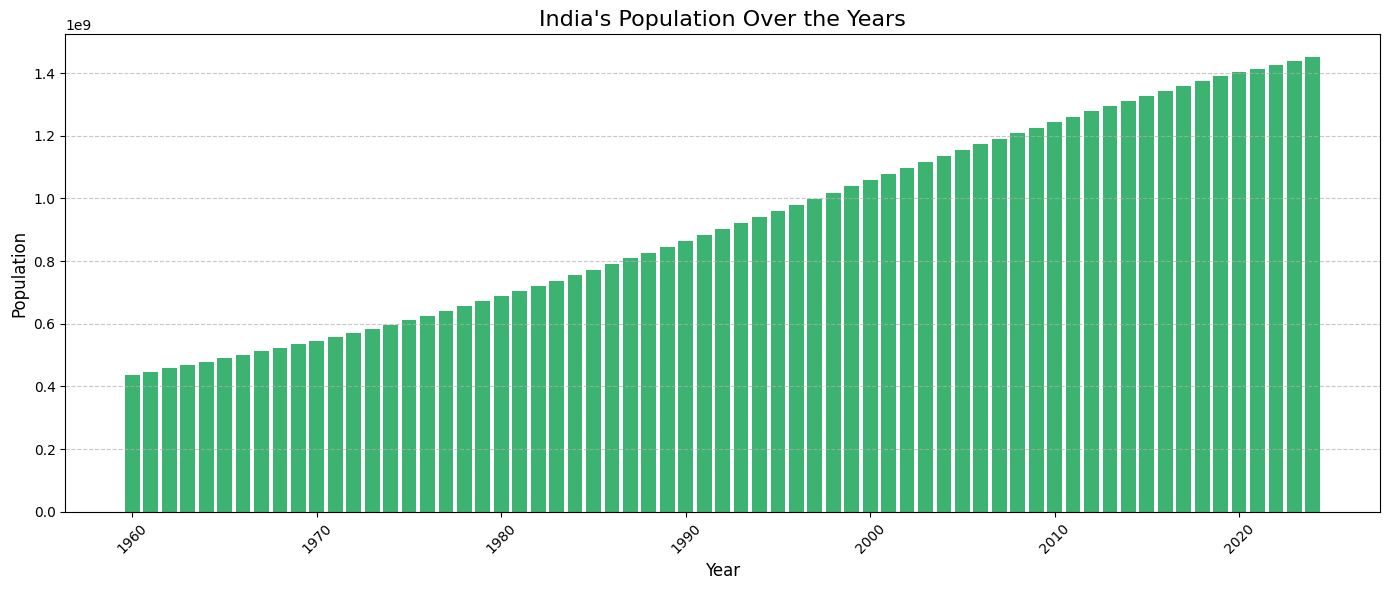

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))  # Wider figure for better year visibility
plt.bar(india_df["Year"], india_df["Value"], color='mediumseagreen')

plt.title("India's Population Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


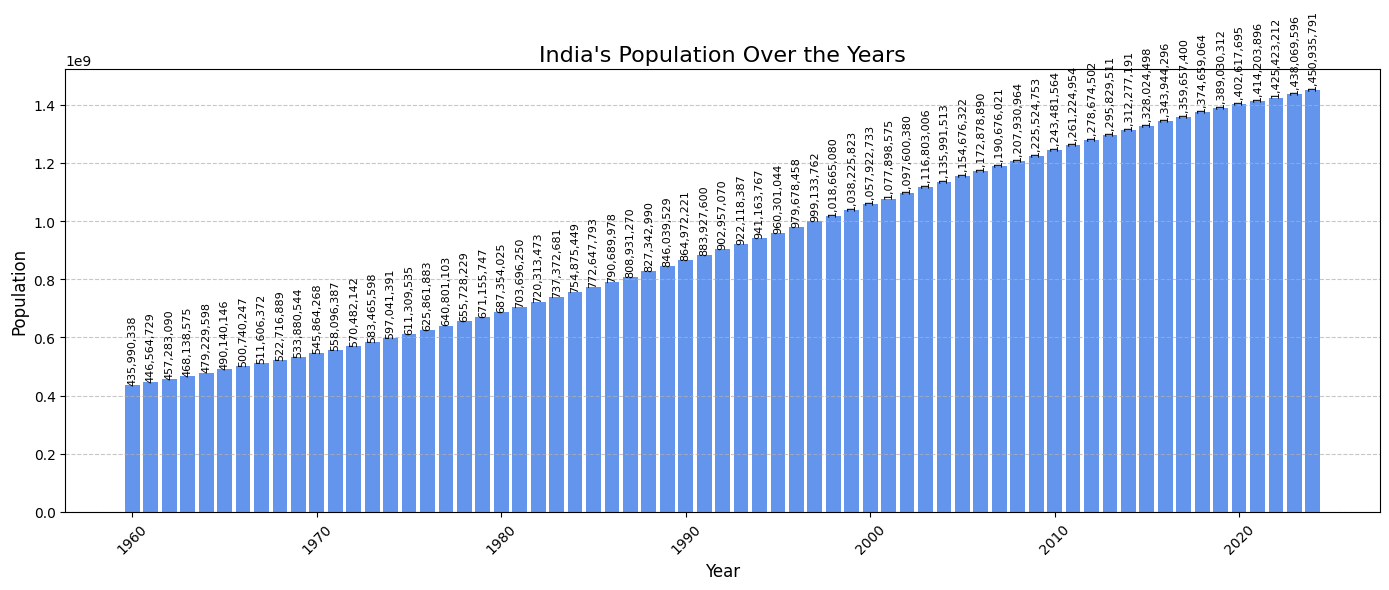

In [5]:
plt.figure(figsize=(14, 6))
bars = plt.bar(india_df["Year"], india_df["Value"], color='cornflowerblue')

plt.title("India's Population Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()


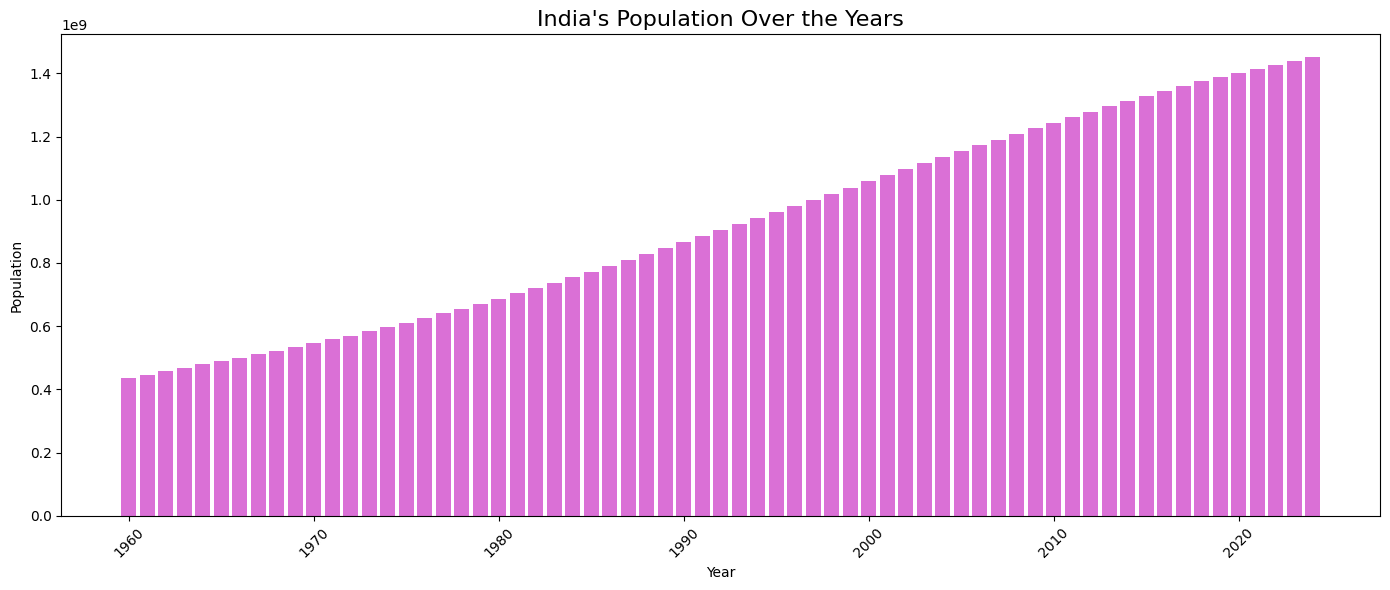

In [6]:
plt.figure(figsize=(14, 6))
plt.bar(india_df["Year"], india_df["Value"], color='orchid')
plt.title("India's Population Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig("india_population_chart.png", dpi=300)
plt.show()


In [8]:
india_df.to_csv("india_population_yearwise.csv", index=False)